# Dataset description

## Dataset info

link https://www.kaggle.com/datasets/ravi72munde/uber-lyft-cab-prices


## Problem description

Services like Uber and Lyft have transformed urban transportation, offering flexibility and convenience to millions of users. This project leverages a comprehensive dataset from Kaggle, featuring Uber and Lyft trip data from Boston, to uncover patterns and relationships affecting ride prices, travel times, and service availability. The primary objective is to gain actionable insights that benefit both users and service providers.

The dataset contains detailed information about Uber and Lyft rides in Boston, including attributes such as date, time, pickup and drop-off coordinates, ride costs across different service categories, weather conditions, travel distance, and the impact of traffic congestion. Using this data, the project aims to understand pricing dynamics, such as how factors like time of day, day of the week, and weather influence ride prices. It also seeks to compare Uber and Lyft services to identify differences in pricing strategies, availability, and user experience

# Dependencies loading

In [1]:
#libraries
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import funs.helpers_1 as he
%matplotlib inline
np.random.seed(2025)

# Data loading

In [2]:
rides = pd.read_csv('../data/input/cab_rides.csv')
rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [3]:
weather = pd.read_csv('../data/input/weather.csv')
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


# Data info

## Unique values

In [4]:
rides.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [5]:
weather.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [6]:
rides.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [7]:
weather.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [8]:
rides.shape,weather.shape

((693071, 10), (6276, 8))

In [9]:
rides.nunique().sort_values()

cab_type                 2
surge_multiplier         7
destination             12
source                  12
product_id              13
name                    13
price                  147
distance               549
time_stamp          114335
id                  693071
dtype: int64

In [10]:
weather.nunique().sort_values()

location        12
humidity        55
clouds         100
rain           437
time_stamp     840
wind          1331
pressure      1494
temp          2031
dtype: int64

In [11]:
duplicated_rows = rides[rides.duplicated(keep=False)]
print(duplicated_rows)

Empty DataFrame
Columns: [distance, cab_type, time_stamp, destination, source, price, surge_multiplier, id, product_id, name]
Index: []


In [12]:
duplicated_rows = weather[weather.duplicated(keep=False)]
print(duplicated_rows)

Empty DataFrame
Columns: [temp, location, clouds, pressure, rain, time_stamp, humidity, wind]
Index: []


## Null values

In [13]:
rides.isnull().sum().sort_values(ascending=False)


price               55095
distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [14]:
weather.isnull().sum().sort_values(ascending=False)

rain          5382
temp             0
location         0
clouds           0
pressure         0
time_stamp       0
humidity         0
wind             0
dtype: int64

In [15]:
rides  = rides.dropna()

We removed null values as its our target

# Change datatypes

In [16]:
rides.dtypes

distance            float64
cab_type             object
time_stamp            int64
destination          object
source               object
price               float64
surge_multiplier    float64
id                   object
product_id           object
name                 object
dtype: object

In [17]:
target_datatypes = {
  'categorical':['source','destination','cab_type','id','product_id','name'],
  'float': [x for x in rides.dtypes[rides.dtypes=='float'].index.to_list() if 'time_stamp' not in x.lower()],
  'integer': [x for x in rides.dtypes[rides.dtypes=='int'].index.to_list() if 'time_stamp' not in x.lower()],
  'datetime_ms':['time_stamp'],
  'datetime':[]
}

In [18]:
target_datatypes

{'categorical': ['source',
  'destination',
  'cab_type',
  'id',
  'product_id',
  'name'],
 'float': ['distance', 'price', 'surge_multiplier'],
 'integer': [],
 'datetime_ms': ['time_stamp'],
 'datetime': []}

In [19]:
rides = he._cast_data(rides,target_datatypes)

In [20]:
weather

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


In [21]:
weather.dtypes

temp          float64
location       object
clouds        float64
pressure      float64
rain          float64
time_stamp      int64
humidity      float64
wind          float64
dtype: object

In [22]:
target_datatypes = {
  'categorical':['location'],
  'float': weather.dtypes[weather.dtypes=='float'].index.to_list(),
  'integer': [x for x in weather.dtypes[weather.dtypes=='int'].index.to_list() if 'time_stamp' not in x.lower()],
  'datetime':['time_stamp'],
  'datetime_ms':[],
}

In [23]:
weather=he._cast_data(weather,target_datatypes)

## Target variable

Our target variable is price.


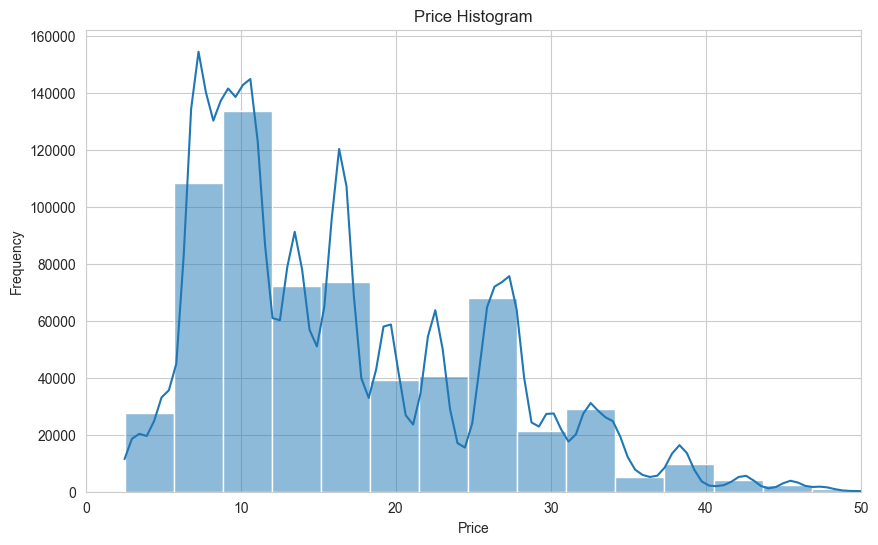

In [24]:
# Histogram of prices
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plot = sns.histplot(rides['price'], bins=30, kde=True)
_title = 'Price Histogram'
plt.title(_title)
plt.xlim(0, 50)
plt.xlabel('Price')
plt.ylabel('Frequency')
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

In [25]:
rides['price'].describe()

count    637976.000000
mean         16.545125
std           9.324359
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

## Feature description

### Categorical

In [26]:
rides.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [27]:
weather.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

#### Source

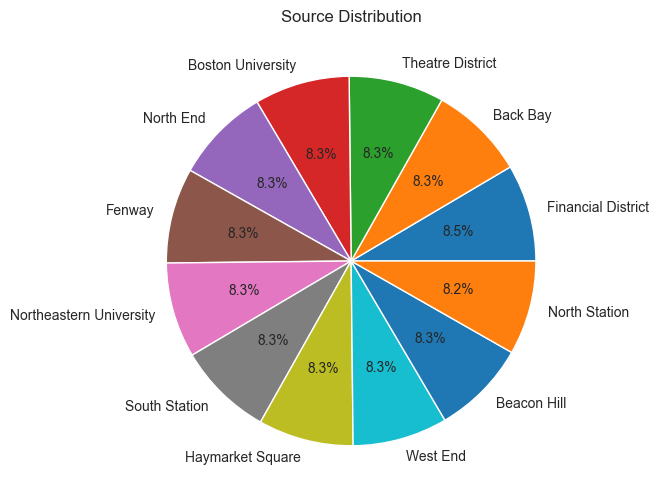

In [28]:
sns.set_style("whitegrid")
plot = plt.figure(figsize=(6,6))
_title = 'Source Distribution'
plt.title(_title)
plt.pie(rides['source'].value_counts(),labels=rides['source'].value_counts().index,autopct='%1.1f%%')
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

#### Destination 

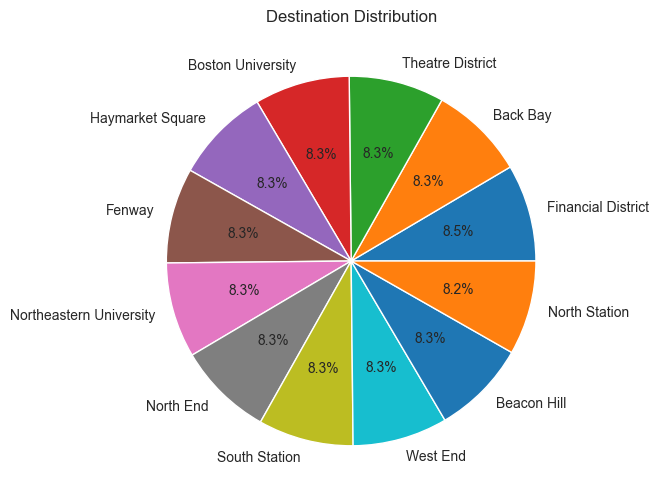

In [29]:
sns.set_style("whitegrid")
plot = plt.figure(figsize=(6,6))
plt.pie(rides['destination'].value_counts(),labels=rides['destination'].value_counts().index,autopct='%1.1f%%')
_title = 'Destination Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

#### Cab Type

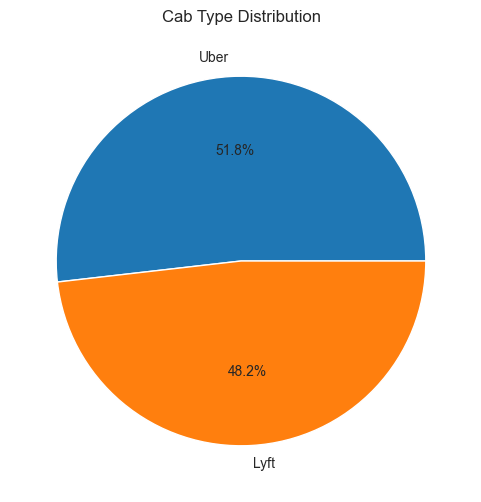

In [30]:
sns.set_style("whitegrid")
plot = plt.figure(figsize=(6,6))
plt.pie(rides['cab_type'].value_counts(),labels=rides['cab_type'].value_counts().index,autopct='%1.1f%%')
_title = 'Cab Type Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

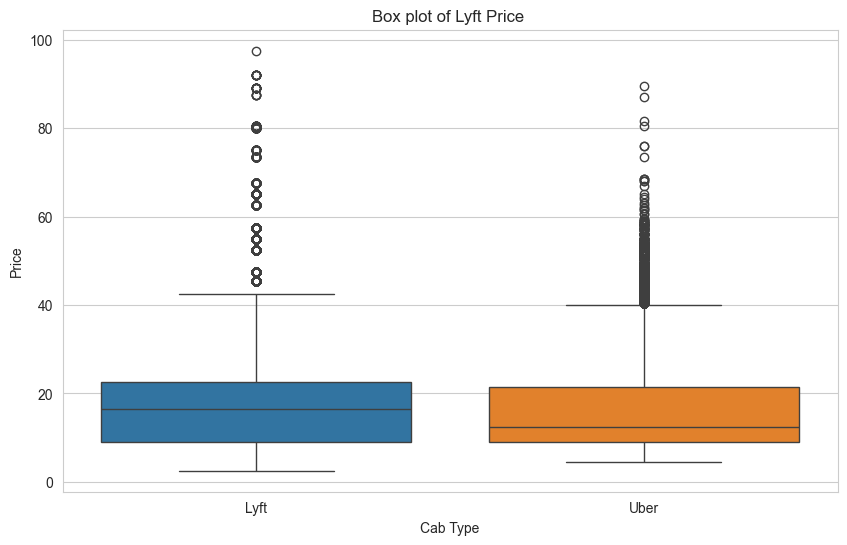

In [32]:
plt.figure(figsize=(10, 6))
plt.title('Box plot of Lyft Price ')
plt.xlabel('Cab Type')
plt.ylabel('Price')
sns.boxplot(x='cab_type', y='price', data=rides, hue ='cab_type')
plt.show()

#### Name

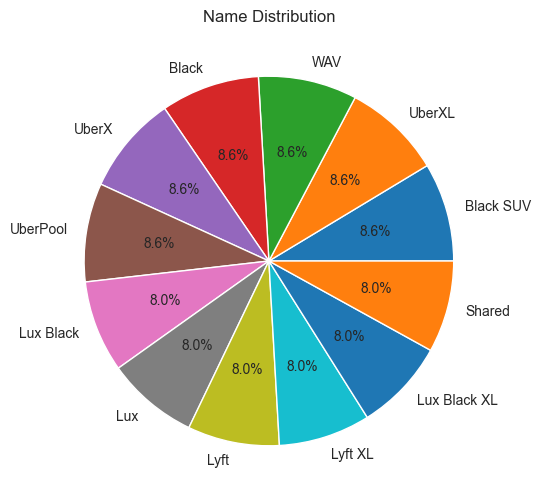

In [247]:
sns.set_style("whitegrid")
plot =plt.figure(figsize=(6,6))
plt.pie(rides['name'].value_counts(),labels=rides['name'].value_counts().index,autopct='%1.1f%%')
_title = 'Name Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

In [248]:
rides['combined'] = rides['cab_type'].astype(str) + ' ' + rides['name'].astype(str)
rides ['combined']

0               Lyft Shared
1                  Lyft Lux
2                 Lyft Lyft
3         Lyft Lux Black XL
4              Lyft Lyft XL
                ...        
693065             Uber WAV
693066          Uber UberXL
693067           Uber UberX
693069       Uber Black SUV
693070        Uber UberPool
Name: combined, Length: 637976, dtype: object

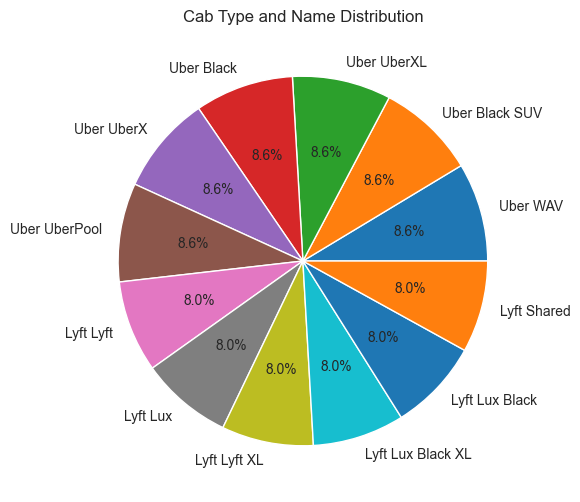

In [249]:
sns.set_style("whitegrid")
plot =plt.figure(figsize=(6,6))
plt.pie(rides['combined'].value_counts(),labels=rides['combined'].value_counts().index,autopct='%1.1f%%')
_title = 'Cab Type and Name Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

In [250]:
rides.drop('combined',axis=1,inplace=True)

In [251]:
rides.groupby(['cab_type', 'name']).size()


C:\Users\kasia\AppData\Local\Temp\ipykernel_50792\1219293461.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rides.groupby(['cab_type', 'name']).size()


cab_type  name        
Lyft      Black               0
          Black SUV           0
          Lux             51235
          Lux Black       51235
          Lux Black XL    51235
          Lyft            51235
          Lyft XL         51235
          Shared          51233
          UberPool            0
          UberX               0
          UberXL              0
          WAV                 0
Uber      Black           55095
          Black SUV       55096
          Lux                 0
          Lux Black           0
          Lux Black XL        0
          Lyft                0
          Lyft XL             0
          Shared              0
          UberPool        55091
          UberX           55094
          UberXL          55096
          WAV             55096
dtype: int64

#### Product id

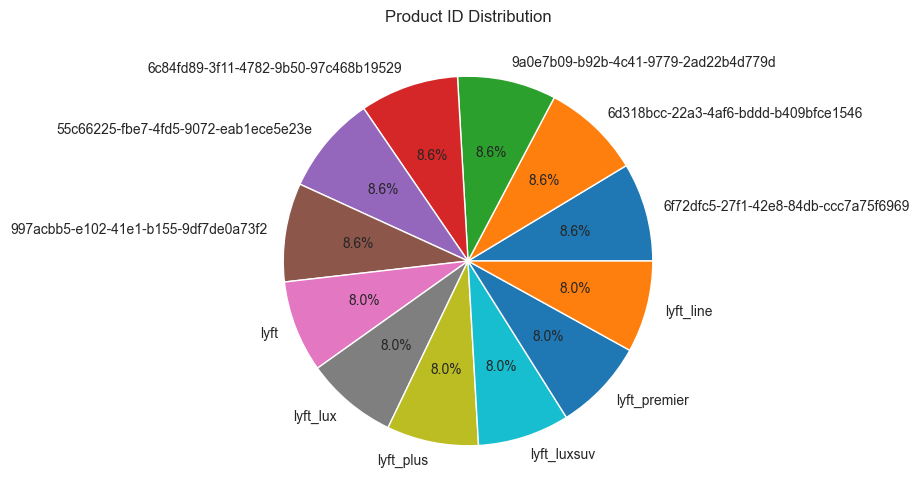

In [252]:
sns.set_style("whitegrid")
plot = plt.figure(figsize=(6,6))
plt.pie(rides['product_id'].value_counts(),labels=rides['product_id'].value_counts().index,autopct='%1.1f%%')
_title = 'Product ID Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

In [253]:
filtered_data = rides.groupby(['cab_type','name', 'product_id']).size()
filtered_data = filtered_data[filtered_data != 0]
print(filtered_data)

cab_type  name          product_id                          
Lyft      Lux           lyft_premier                            51235
          Lux Black     lyft_lux                                51235
          Lux Black XL  lyft_luxsuv                             51235
          Lyft          lyft                                    51235
          Lyft XL       lyft_plus                               51235
          Shared        lyft_line                               51233
Uber      Black         6c84fd89-3f11-4782-9b50-97c468b19529    55095
          Black SUV     6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
          UberPool      997acbb5-e102-41e1-b155-9df7de0a73f2    55091
          UberX         55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
          UberXL        6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
          WAV           9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
dtype: int64


C:\Users\kasia\AppData\Local\Temp\ipykernel_50792\3778620903.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_data = rides.groupby(['cab_type','name', 'product_id']).size()


###  Selected Numerical Features

#### Surge Multiplier - Dynamic price growth rate.

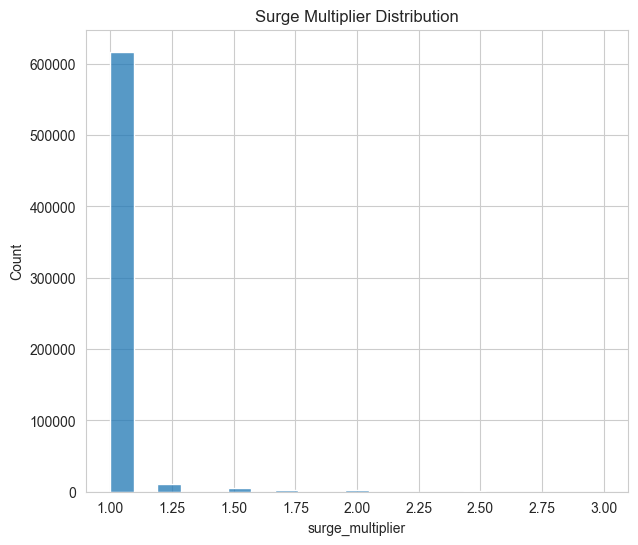

In [254]:
sns.set_style("whitegrid")
plot = plt.figure(figsize=(7, 6))
sns.histplot(rides, x = "surge_multiplier")
_title = 'Surge Multiplier Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

#### Distance

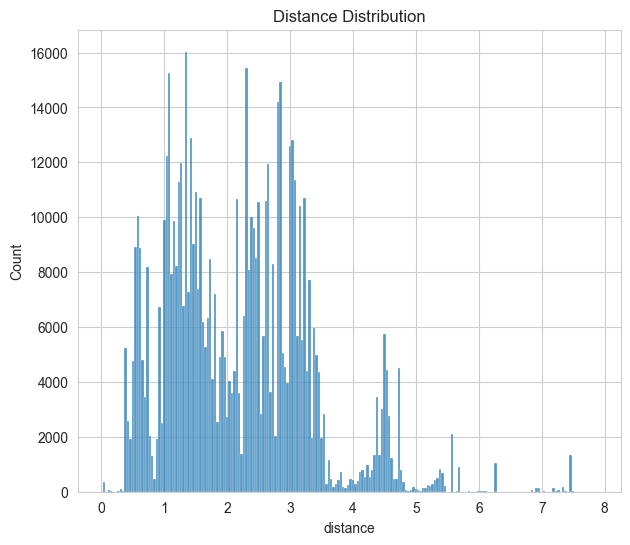

In [255]:
sns.set_style("whitegrid")
plot = plt.figure(figsize=(7, 6))
sns.histplot(rides, x = "distance")
_title = 'Distance Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

#### Temperature    

In [256]:
weather['temp'].describe()

count    6276.000000
mean       39.090475
std         6.022055
min        19.620000
25%        36.077500
50%        40.130000
75%        42.832500
max        55.410000
Name: temp, dtype: float64

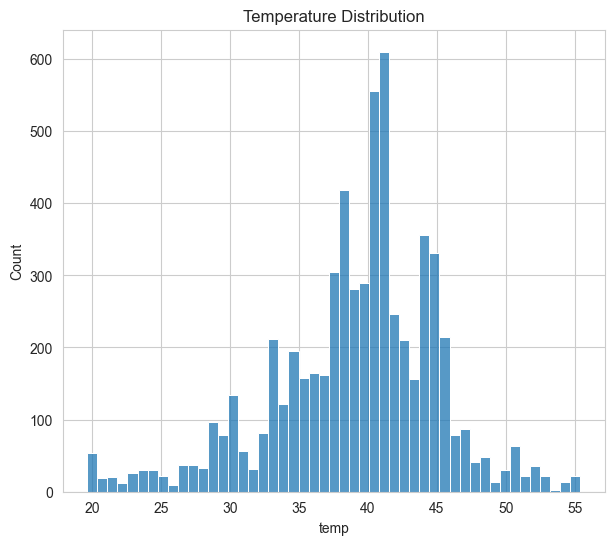

In [257]:
sns.set_style("whitegrid")
plot = plt.figure(figsize=(7, 6))
sns.histplot(weather, x = "temp")
_title = 'Temperature Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

#### Clouds

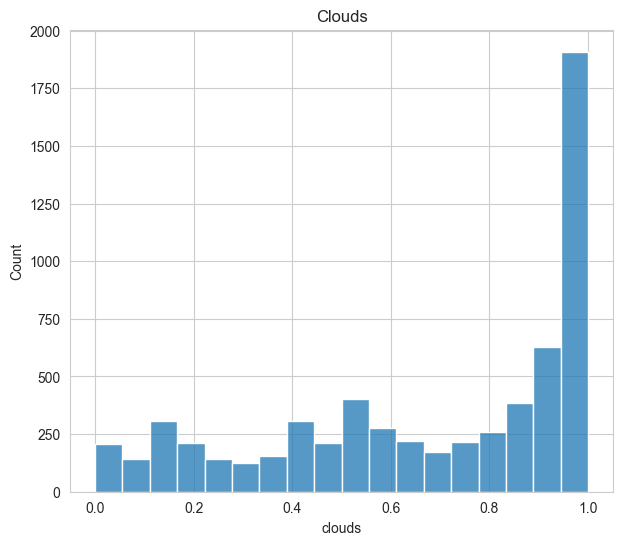

In [258]:
sns.set_style("whitegrid")
plot = plt.figure(figsize=(7, 6))
sns.histplot(weather, x = "clouds")
_title = 'Clouds'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

#### Humidity

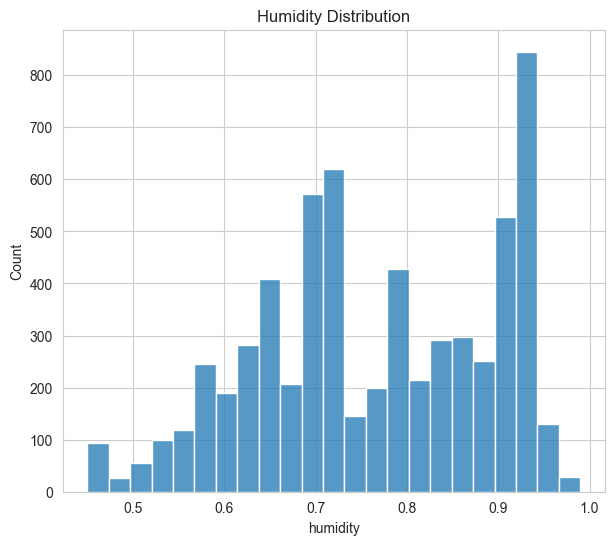

In [259]:
sns.set_style("whitegrid")
plot = plt.figure(figsize=(7, 6))
sns.histplot(weather, x = "humidity")
_title = 'Humidity Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

#### Pressure   

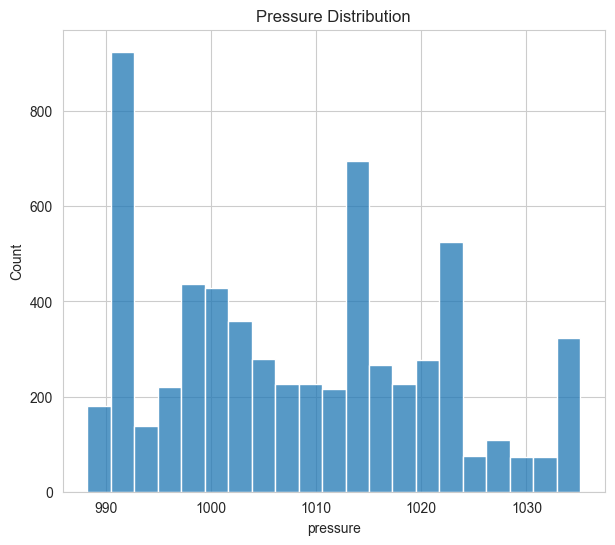

In [260]:
sns.set_style("whitegrid")
plot = plt.figure(figsize=(7, 6))
sns.histplot(weather, x = "pressure")
_title = 'Pressure Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

#### Rain

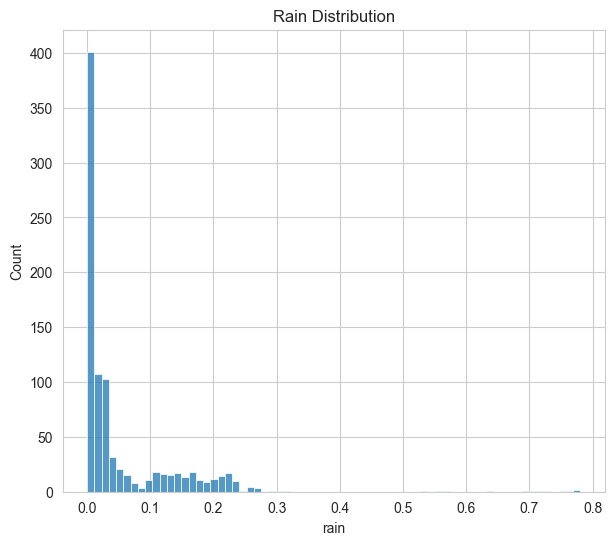

In [261]:
sns.set_style("whitegrid")
plot = plt.figure(figsize=(7, 6))
sns.histplot(weather, x = "rain")
_title = 'Rain Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

#### Wind

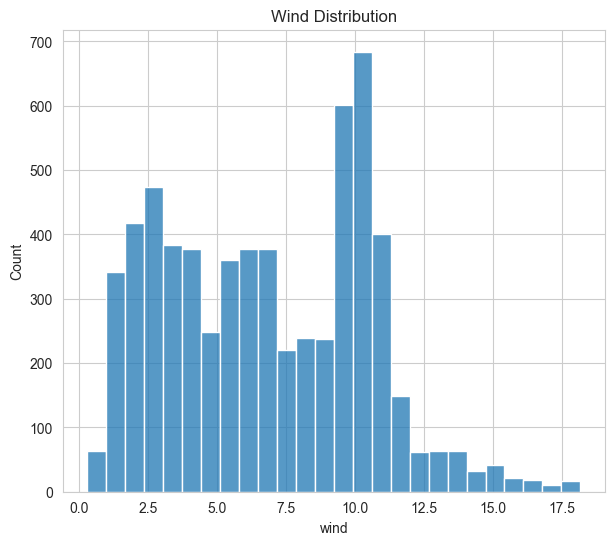

In [262]:
sns.set_style("whitegrid")
plot = plt.figure(figsize=(7, 6))
sns.histplot(weather, x = "wind")
_title = 'Wind Distribution'
plt.title(_title)
fig = plot.get_figure()
fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
plt.show()

### Combined analysis of categorical and numerical variables

#### Price and distance relationship

In [263]:

# # Plot the scatter plot of prices by distance
# sns.set_style("whitegrid")
# plt.figure(figsize=(10, 6))
# plot = sns.scatterplot(x='distance', y='price', data=merged_data)
# _title = 'Scatter Plot of Prices by Distance'
# plt.title(_title)
# plt.xlabel('Distance')
# plt.ylabel('Price')
# fig = plt.gcf()  # Get the current figure
# fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
# plt.show()

#### Price and Cab Type relationship

In [264]:
# # Boxplot of prices by cab type
# sns.set_style("whitegrid")
# plt.figure(figsize=(10, 6))
# plot = sns.boxplot(x='cab_type', y='price', data=merged_data)
# _title = 'Boxplot of Prices by Cab Type'
# plt.title(_title)
# fig = plot.get_figure()
# fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
# plt.xlabel('Cab Type')
# plt.ylabel('Price')
# plt.show()

#### Price and Temperture relationship

In [265]:
# plt.figure(figsize=(10, 6))
# sns.set_style("whitegrid", {'font_scale': '1.6'})
# plot = sns.scatterplot(x='temp', y='price', data=merged_data)
# _title = 'Scatter Plot of Prices by Temperature'
# plt.title(_title)
# fig = plot.get_figure()
# fig.savefig(f'../data/outputs/1.eda/{_title.replace(" ","_")}.png')
# plt.xlabel('Temperature')
# plt.ylabel('Price')
# plt.show()

# Save data

In [266]:
rides.to_pickle("../data/outputs/1.eda/rides_preprocessed.pkl")
weather.to_pickle("../data/outputs/1.eda/weather_preprocessed.pkl")